# SPATIAL TRANSCRIPTOMICS ANALYSIS FOR D1 SAMPLE

## LOAD PACKAGES

In [ ]:
%%bash
pip install scapy
pip install anndata

In [2]:
import scanpy as sc
import squidpy as sq 
import anndata as ad 
import scipy as sp
import numpy as np

## Convert SpaceRanger output to AnnData

In [3]:
# Specify the location
path_visium="/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs"
h5ad_file="/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs/filtered_feature_bc_matrix.h5"
image="/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs/spatial/tissue_hires_image.png"

adata = sc.read_visium(path=path_visium,
                       genome="GRCh38",
                       count_file=h5ad_file,
                       load_images=True,
                       library_id="Visium_FFPE_Mouse_Brain_D1",
                       source_image_path=image)

/opt/miniconda/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [55]:
# Specify the location
path_visium="/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs"
h5ad_file="/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs/filtered_feature_bc_matrix.h5"
image="/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs/spatial/"

adata2 = sq.read.visium(path=path_visium,
                        counts_file=h5ad_file,
                        load_images=True,
                        library_id="Visium_FFPE_Mouse_Brain_D1",
                        source_image_path=image
                        )

/opt/miniconda/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [57]:
#print(adata.var_names)
adata.var_names_make_unique()

adata2.var_names_make_unique()

In [60]:
print(adata2.uns['spatial'])

{'Visium_FFPE_Mouse_Brain_D1': {'metadata': {'chemistry_description': 'Visium V4 Slide', 'software_version': 'spaceranger-2.1.0', 'source_image_path': '/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs/spatial'}, 'images': {'hires': array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 1

In [38]:
adata.X

<3559x18085 sparse matrix of type '<class 'numpy.float32'>'
	with 21355822 stored elements in Compressed Sparse Row format>

In [39]:
# Test - Extract path in uns part
print(adata.uns['spatial'][library_names]["metadata"]["source_image_path"])

/mnt/rdisk/duydao/scRNAseq/Spatial_transcriptomics/GeneSmart/output/D1/HTI_spaceranger_count_D1/outs/spatial/tissue_hires_image.png


In [40]:
adata.uns['spatial']['library_id']="Visium_FFPE_Mouse_Brain_D1"
print(adata)

AnnData object with n_obs × n_vars = 3559 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [21]:
import re

# add info on mitochondrial and hemoglobin genes to the objects.
adata.var['mt'] = adata.var_names.str.contains('^MT', flags=re.IGNORECASE)
adata.var['hb'] = adata.var_names.str.contains("^HB", flags=re.IGNORECASE)

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','hb'], percent_top=None, log1p=False, inplace=True)

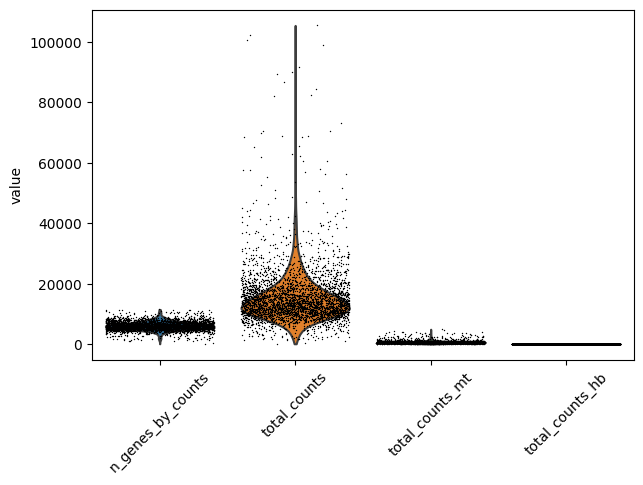

In [22]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'total_counts_mt', 'total_counts_hb'],
             jitter=0.4, rotation= 45)

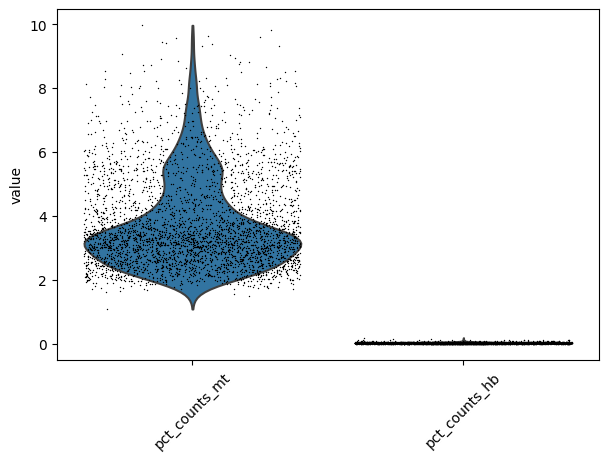

In [23]:
sc.pl.violin(adata, ['pct_counts_mt', 'pct_counts_hb'],
             jitter=0.4, rotation= 45)

In [42]:

adata.uns
print(adata.uns['spatial']['Visium_FFPE_Mouse_Brain_D1']['images']['hires'])

[[[0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  ...
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]]

 [[0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  ...
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]]

 [[0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  ...
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]]

 ...

 [[0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  ...
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]]

 [[0.06666667 0.06666667 0.06666667]
  [0.06666667 0.06666667 0.06666667]


In [ ]:
# need to plot the two sections separately and specify the library_id

sc.pl.spatial(adata2)

In [58]:
sq.pl.spatial_scatter(adata2, 
                      spatial_key='spatial',
                      img=True, 
                      img_res_key='hires'
                      )

TypeError: can't multiply sequence by non-int of type 'float'

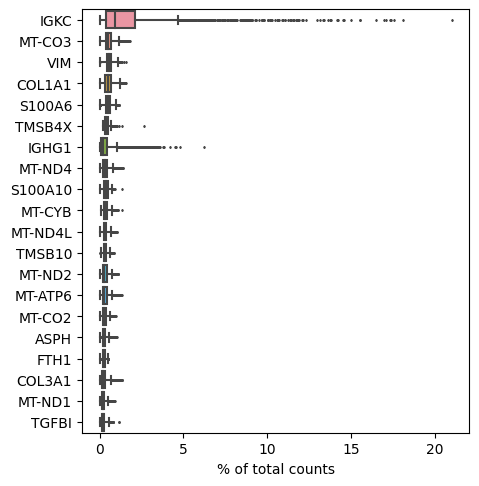

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)